## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

# Базовая модель

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [2]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [33]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.consumer_min = consumer_min
        self.consumer_max = consumer_max
        self.seller_min = seller_min
        self.seller_max = seller_max
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
        



            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        if end - start >= 2000:
            fig = plt.figure(figsize = (40,10))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [34]:
random.seed(42)
model = Model(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.3,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(20000)

100%|██████████| 20001/20001 [00:00<00:00, 71999.98it/s]


## Визуализация модели

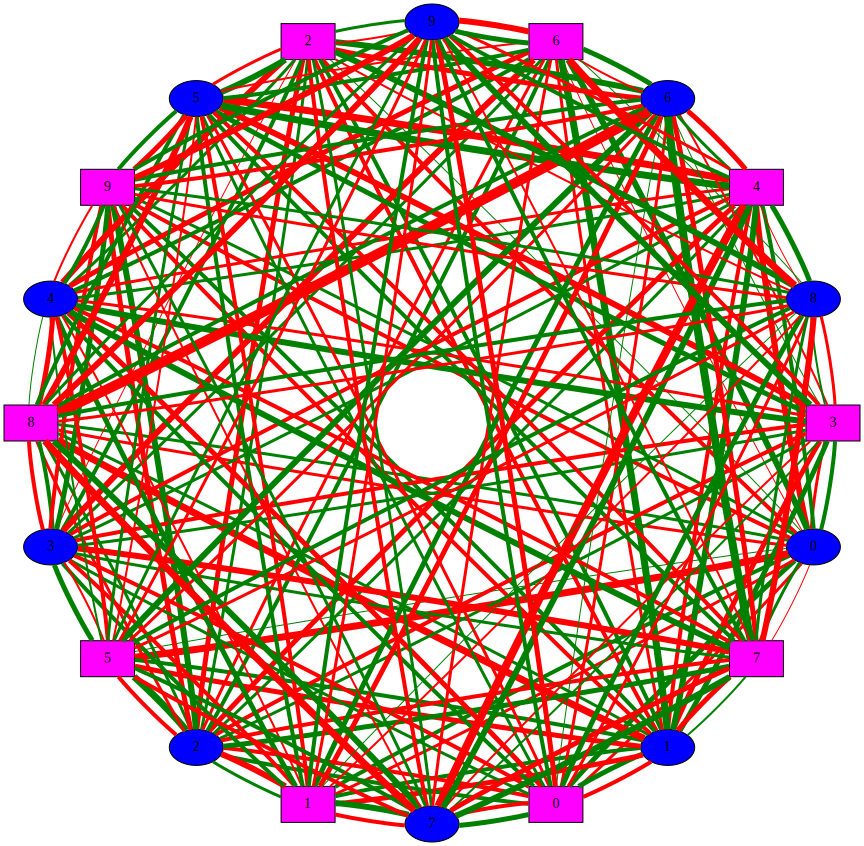

In [35]:
model.plot_graph(100, 2000)

## Результаты моделирования

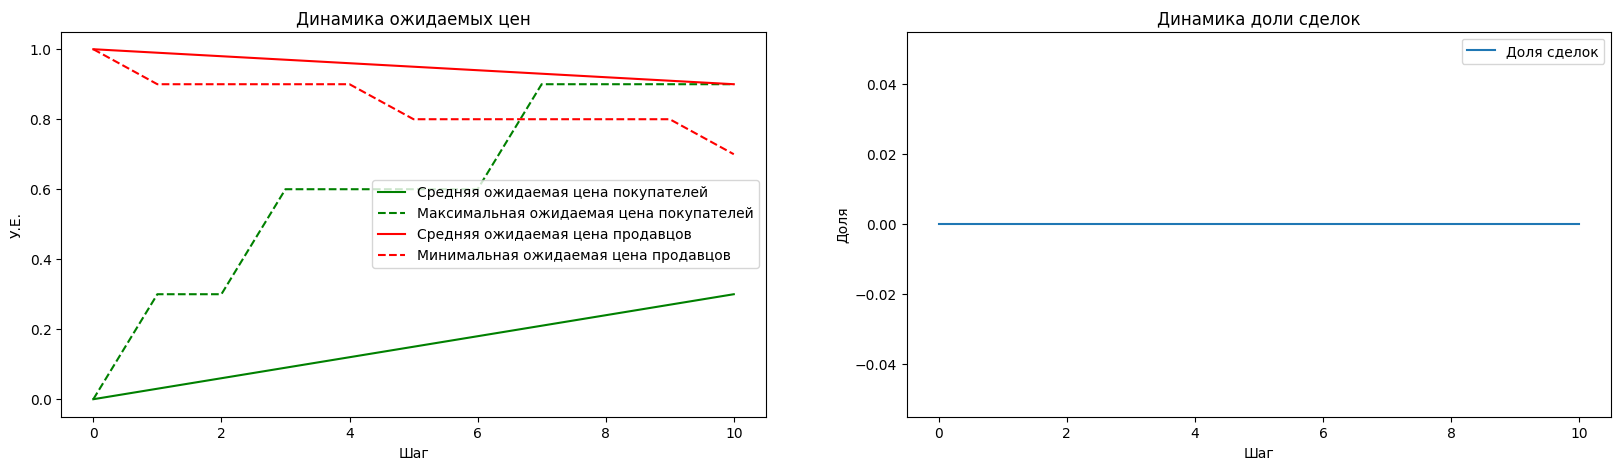

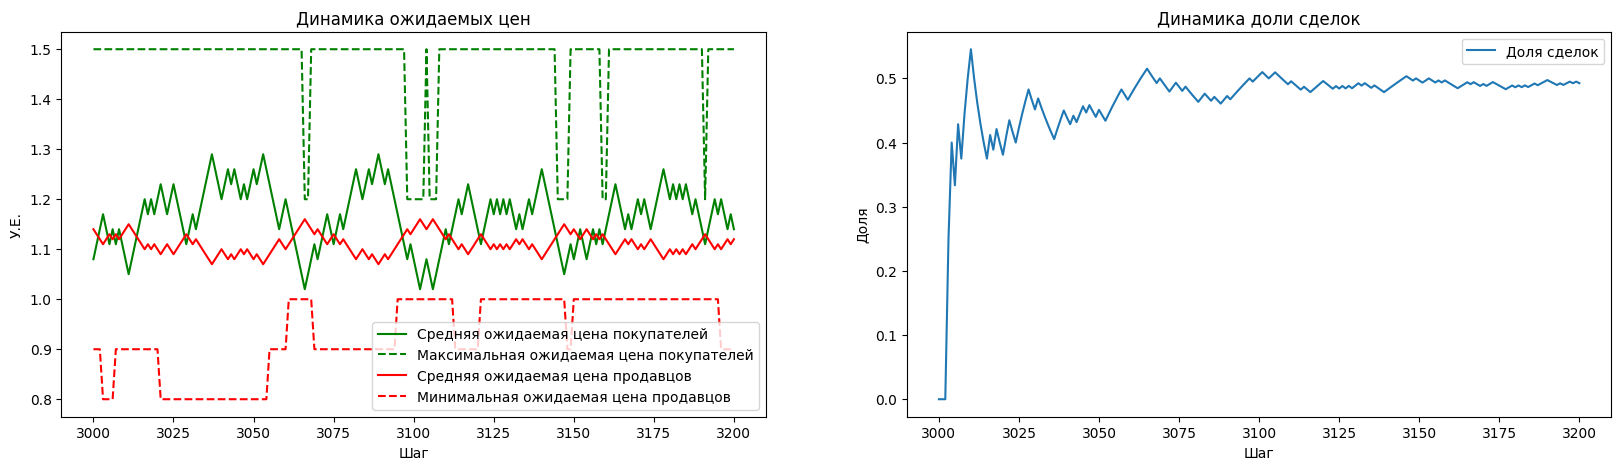

<Figure size 2000x500 with 0 Axes>

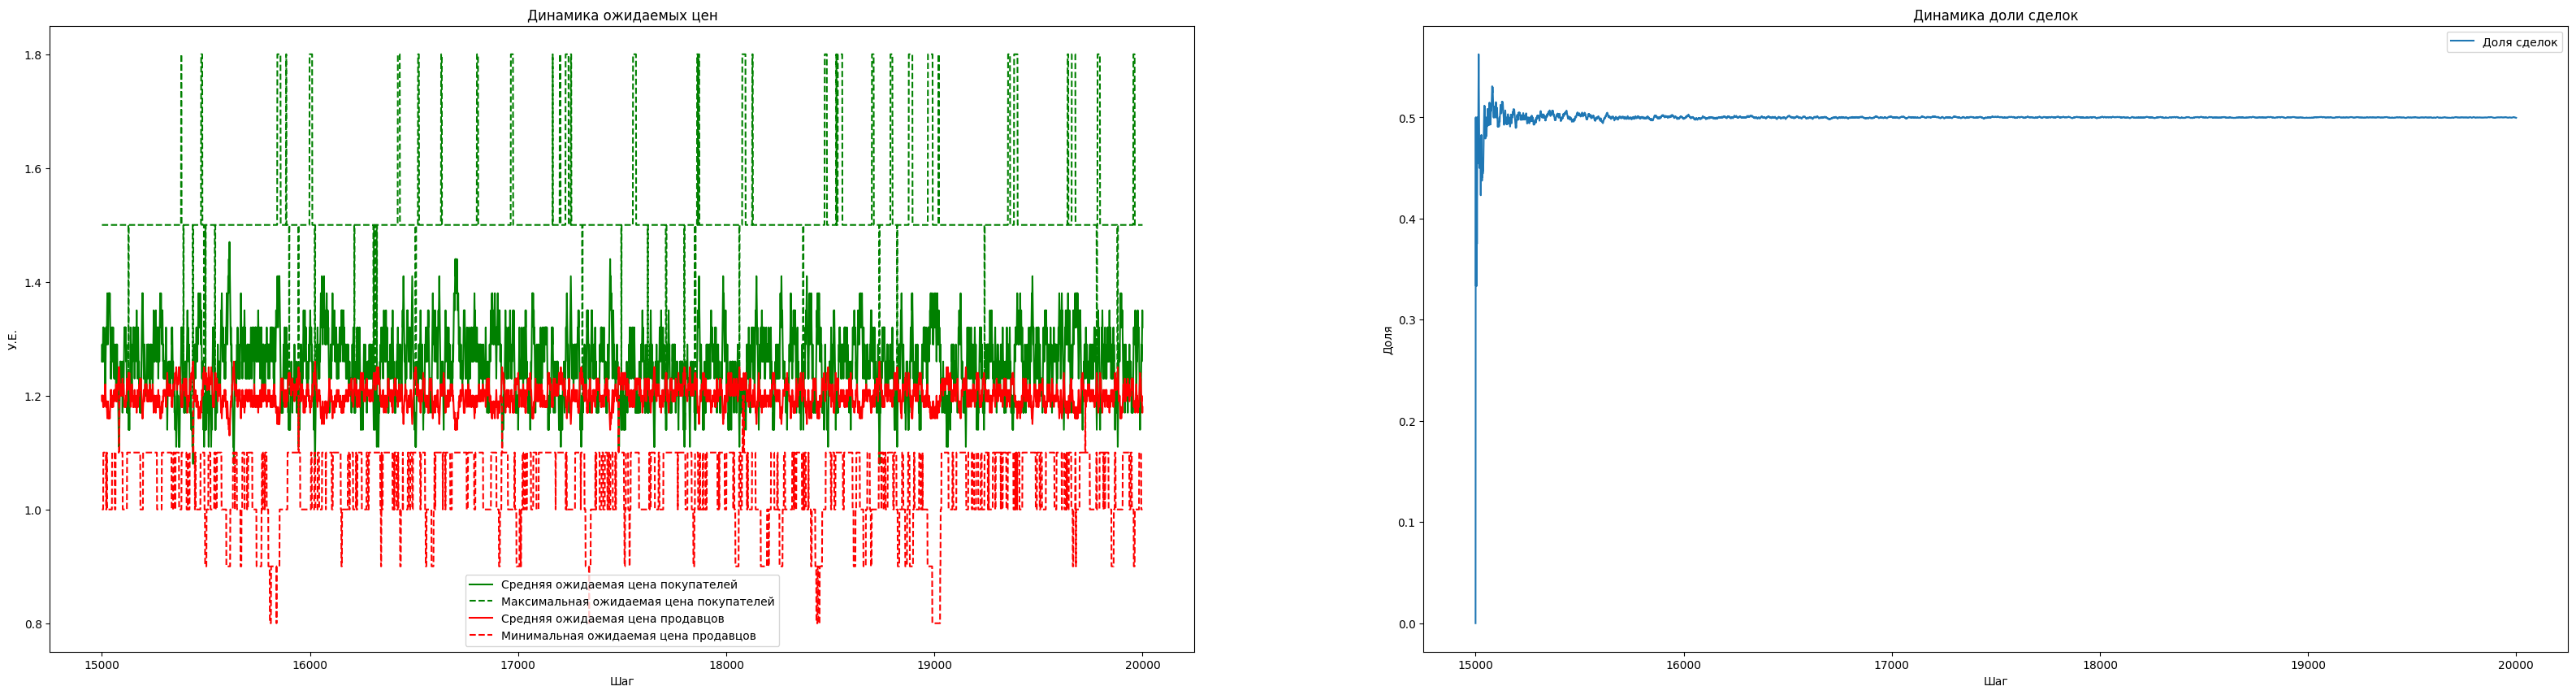

In [37]:
model.plot_dynamics(0, 10)
model.plot_dynamics(3000, 3200)
model.plot_dynamics(15000, 20000)

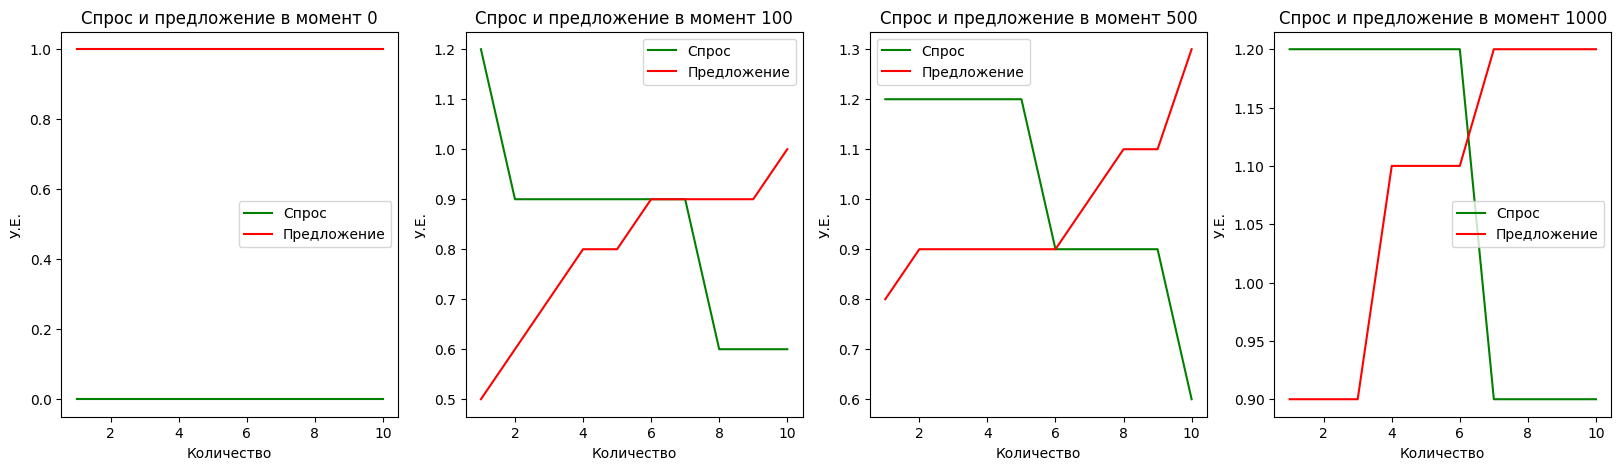

In [7]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень. 
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

1. При увеличении количества сделок, ожидаемые цены для покупателя и продавца устанавливаются на определенных диапозонах, причем далее, начиная с некоторого значения с увеличением кол-ва сделок этот диапозон не изменяется, потому что вне зависимости от результата сделки цены покупателей и продавцов изменяются, поэтому средние ожидаемые цены будут колебаться, но если увеличить шаг графика до количества сделок равного кол-ву продавцов или покупателей, то колебания исчезнут. Дельта для покупателей и для продавцов влияет на величину установившихся диапозонов прямо пропорционально, потому что чем меньше дельта, тем незначительнее меняются ожидаемые цены, тем меньше колебания у состояния равновесия. 
2. Доля сделок выходит на постоянные уровень раньше, чем это совершает средние ожидаемые цены, причем устанавливается на уровне 50%. Колебания этого значения увеличиваются при увеличении дельт для покупателя и продавца. Доля сделок выходит на постоянный уровень не только потому, что ожидаемые цены продавцов и покупателей сходятся(потому что если они отличаются, то после сделки, дельта их сближает), но и потому что с ростом количества сделок колебания ожидаемых цен покупателей и продавцов становятся незначительными к количеству совершенных сделок. Далее почти всегда при больших количествах сделок доля сделок будет константной(но не во всех моделях = 1/2).
3. Скорость сходимости уменьшается с ростом количества продавцов и покупателей  
потому что, потому что чем больше агентов, тем большее количество сделок мы должны провести чтобы привести все цены к ожидаемым. Для дельты наоборот, чем больше соответственная дельта, тем быстрее сходится к единому уровню, нам надо меньше сделок, чтобы изменить цены на определенную величину. 
4. Диаграмма связей выглядит не симметрично(особенно если агентов много) в начале, потому что на то какие сделки совершались в большинстве своем влияет рандом, однако если выбрать большой диапазон для диаграммы она будет примерно симметричной для каждого агента, потому что на большом диапозоне количество сделок для каждого агента примерно одинаковое

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. **К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.** (мой вариант)

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [29]:
def mean(lst):
    return sum(lst)/len(lst)


class Model_2:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, period):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            period -- как часто случайно изменяются границы

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.consumer_min = consumer_min
        self.consumer_max = consumer_max
        self.seller_min = seller_min
        self.seller_max = seller_max
        self.average_delta = consumer_delta + seller_delta
        self.cnt = 0
        self.period = period


        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        self.consumers_expect_price = []
        
        self.sellers_expect_price = []

        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            self.consumers[consumer_id].decrease_expect_price()

            self.sellers[seller_id].increase_expect_price()
            
        else:
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            self.sellers[seller_id].decrease_expect_price()

            self.consumers[consumer_id].increase_expect_price()
        if self.cnt%self.period == self.period - 1:
            x = random.uniform(-1, 1) #вот здесь случайная величина появляется
            for seller in self.sellers:
                seller.min_price += x*self.average_delta #ввели переменную среднюю дельту, чтобы менять граничные цены на некоторую сопостовимую величину 
            for consumer in self.consumers:
                consumer.max_price += x*self.average_delta
        self.cnt += 1


            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1):
            
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            seller_id = random.randrange(0, self.num_of_sellers)
            
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        fig = plt.figure(figsize = (20,5))
        if end - start >= 2000:
            fig = plt.figure(figsize = (40,10))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

          
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
          
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''

        g_deals = {}

        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }
  
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta
        else: 
            self.expect_price = self.max_price 

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta
        else:
            self.expect_price = self.min_price



In [30]:
random.seed(42)
model = Model_2(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.3,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              period = 100)
model.run(20000)

100%|██████████| 20001/20001 [00:00<00:00, 91171.41it/s] 


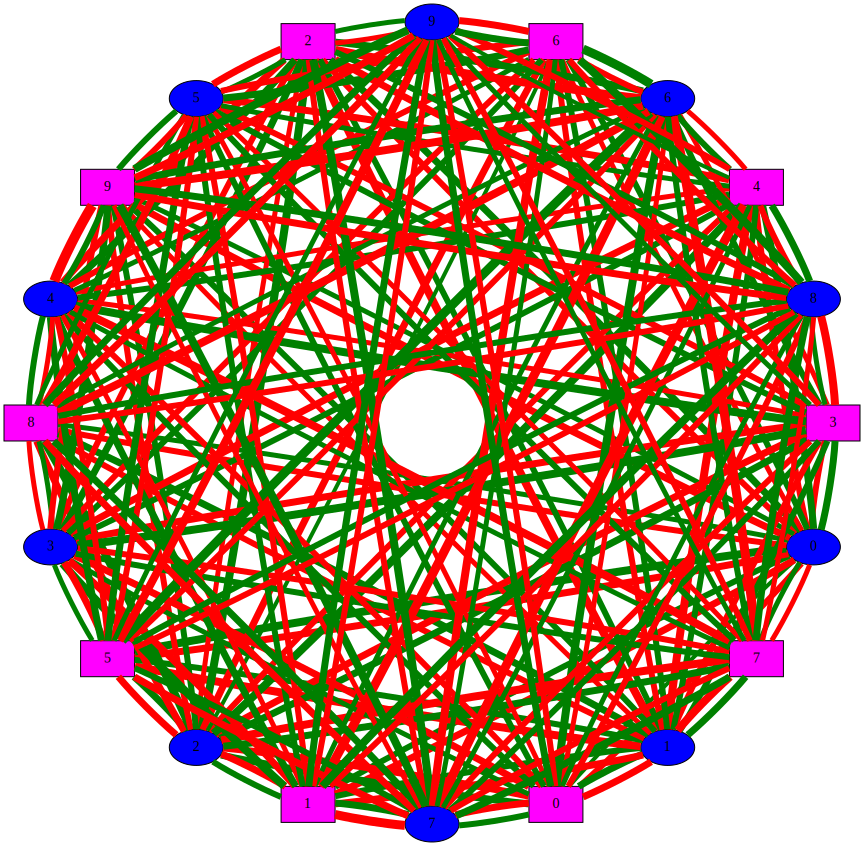

In [31]:
model.plot_graph(0, 10000)

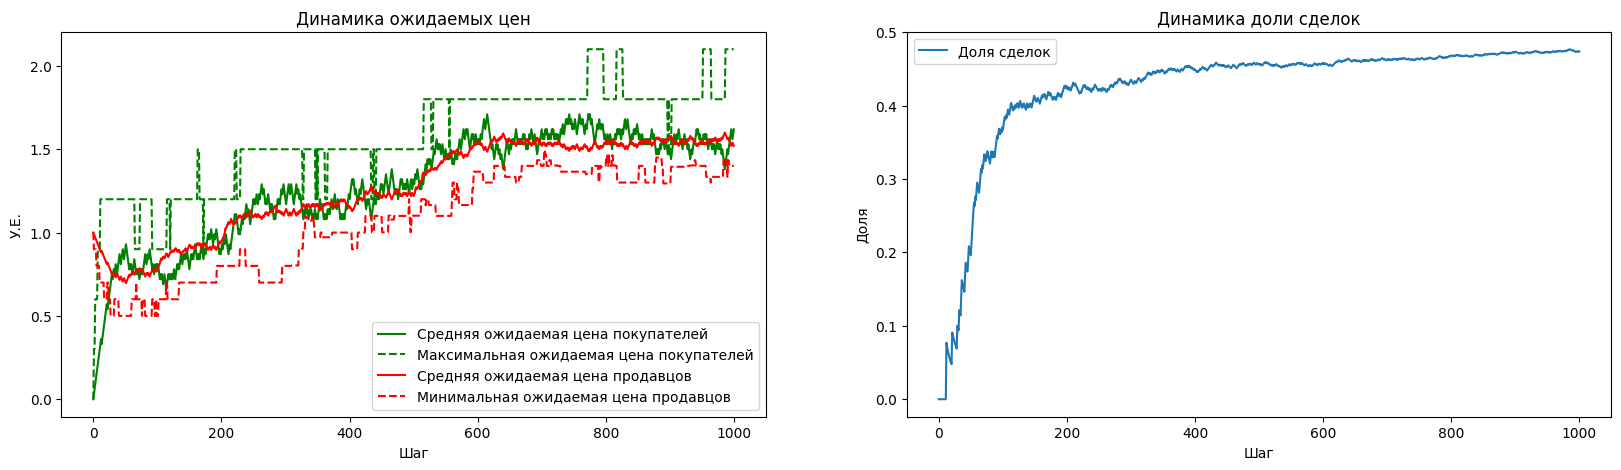

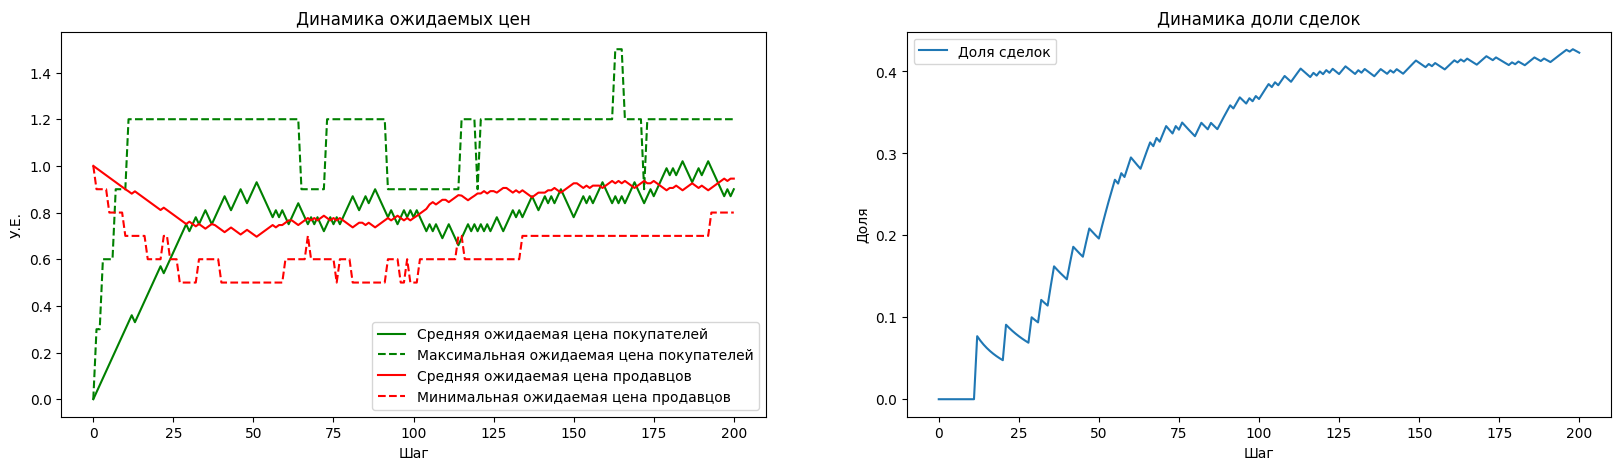

<Figure size 2000x500 with 0 Axes>

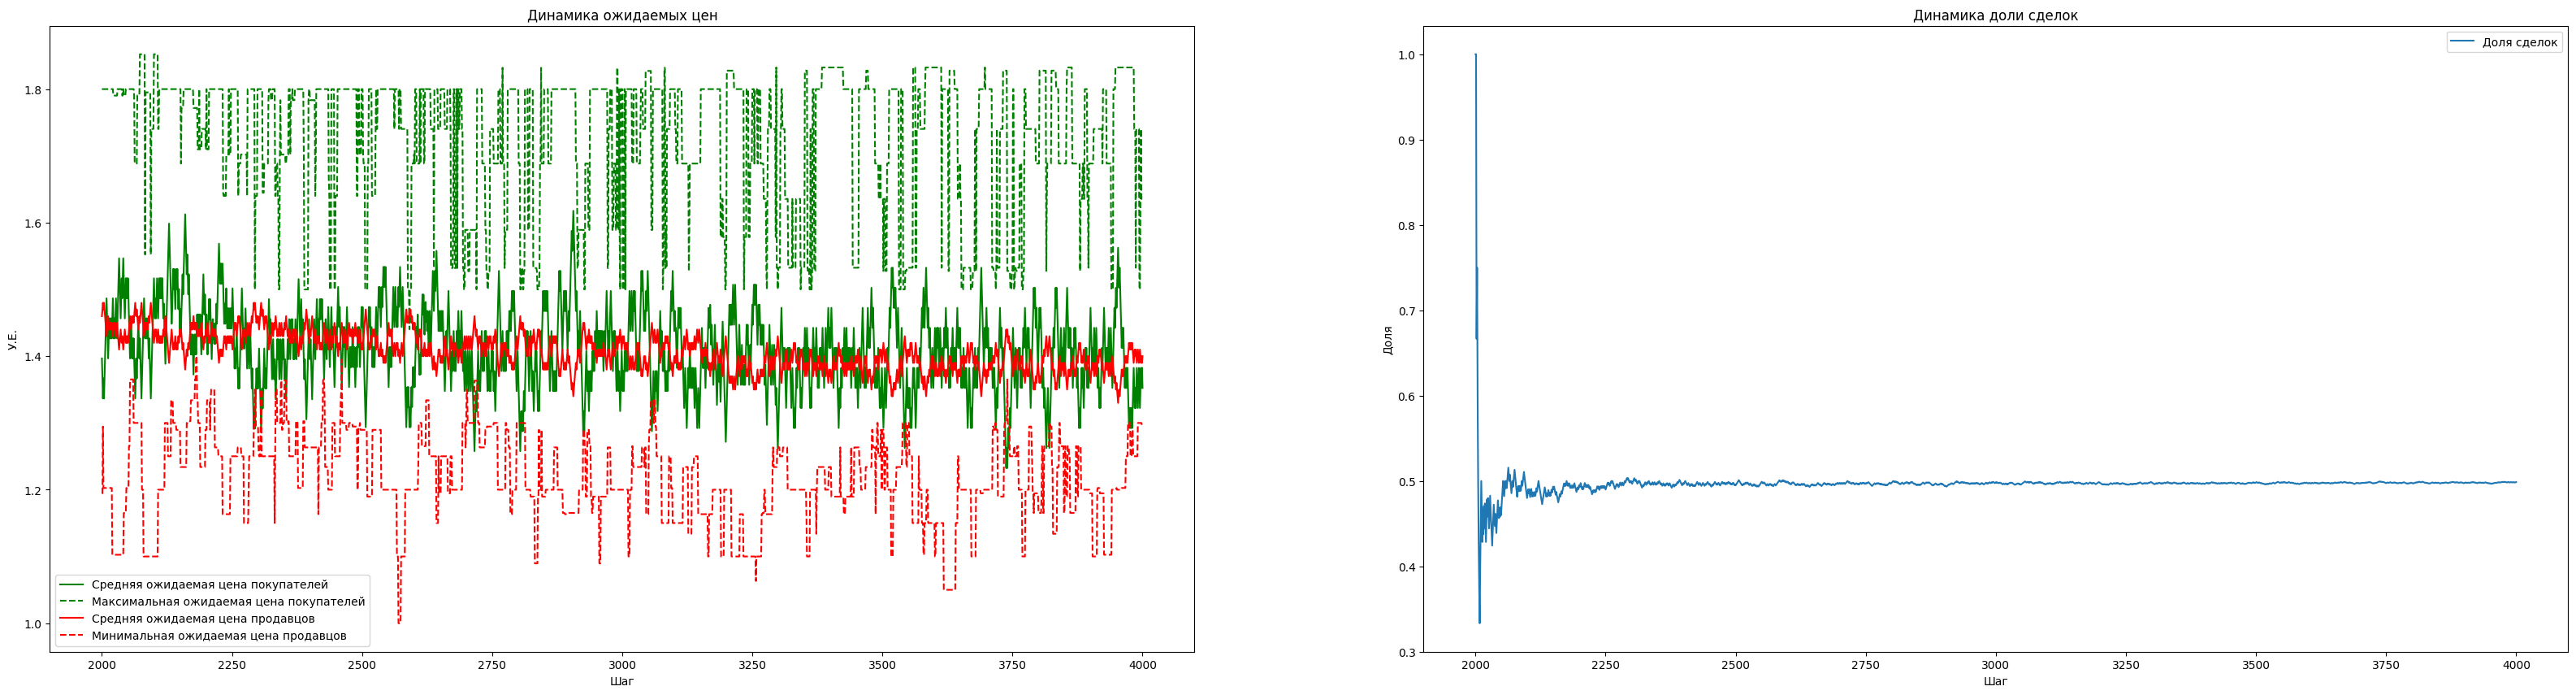

In [32]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(2000, 4000)

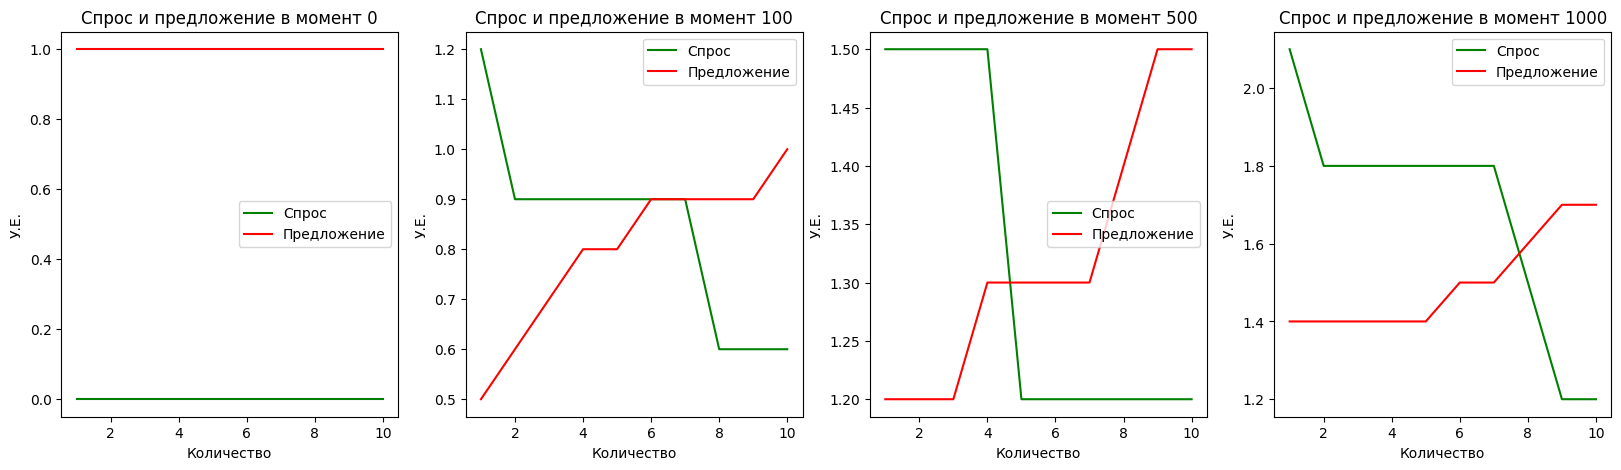

In [11]:
model.plot_supply_and_demand([0, 100, 500, 1000])

Поведение графиков ожидаемых цен и долей сделок очень сильно зависят от того, какого порядка величину мы прибавляем к граничным ценам, в данном примере мы прибавляем(возможно отрицательную) величину сопоставимую по порядку с delta для продавца и покупателя. Из-за этого средние ожидаемые цены находятся примерно на одном уровне, но изменяются(коррелируют), форма графика средней ожидаемой цены очень сильно зависит от random.seed(), т.к. мы ограничили случайное изменение границ, то доля сделок не сильно. Кроме этого я ввел величину cnt для счета периодов, чем больше мы делаем период, через который изменяются граничные цены, тем меньше колебания графика. 
Новые графики выглядят так, потому что периодически диапозон в котором опряделяется наша цена изменяется, поэтому цене приходится быстро переходить в этот диапозон. Доля сделок с колебаниями все равно фиксируется на уровне 0,5 если изменение граничных цен не сильное или редкое, т.к. тогда expected price не сильно изменяется, доля сделок равна 1/2.

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. **Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день**. (мой вариант)
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [38]:
def mean(lst):
    return sum(lst)/len(lst)


class Model_3: # добавили + 2 варианта 
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections, consumer_max_per_day):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.consumer_min = consumer_min
        self.consumer_max = consumer_max
        self.seller_min = seller_min
        self.seller_max = seller_max
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections
        self.consumer_max_per_day = consumer_max_per_day
        self.cnt = 0
        self.general_cnt = 0
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
      
        self.consumers_expect_price = []
        
        
        self.sellers_expect_price = []

        
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        if self.consumers[consumer_id].consumer_cnt > self.consumer_max_per_day: #вот тут проверяем есть контакт или нет
            self.consumers[consumer_id].status = 1
            return 0;
        
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])


        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })


            self.consumers[consumer_id].decrease_expect_price()


            self.sellers[seller_id].increase_expect_price()
            self.consumers[consumer_id].consumer_cnt += 1;
            
        else:

            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })


            self.sellers[seller_id].decrease_expect_price()

            self.consumers[consumer_id].increase_expect_price()
        self.cnt += 1
        if self.cnt == self.max_connections:
            self.cnt = 0
            for consumer in self.consumers:
                consumer.consumer_cnt = 0
                consumer.status = 0
        return 1;


            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for i in trange(num_of_steps+1):
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            seller_id = random.randrange(0, self.num_of_sellers)
            
            self.general_cnt += self.deal(consumer_id, seller_id);
            if (i % 2*len(self.consumers) == 0):
                flag = 1
                for consumer in self.consumers:
                  flag *= consumer.status
                if flag == 1:
                    self.cnt = 0
                    for consumer in self.consumers:
                        consumer.consumer_cnt = 0
                        consumer.status = 0
        print(f' вот столько сделок совершенно в моделе: {self.general_cnt}')

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        fig = plt.figure(figsize = (20,5))
        if end - start >= 2000:
            fig = plt.figure(figsize = (40,10))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")


        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        

        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        g_deals = {}

      
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }
   
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        self.consumer_cnt = 0
        self.status = 0 #если 0 ещё может совершать сделки в этот день
        

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta
        else: 
            self.expect_price = self.max_price 

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.seller_cnt = 0

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta
        else:
            self.expect_price = self.min_price #тут аналогично тому что выше


In [39]:
random.seed(42)
model = Model_3(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.3,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              max_connections=60,
              consumer_max_per_day=1)
model.run(20000)

100%|██████████| 20001/20001 [00:00<00:00, 256862.53it/s]

 вот столько сделок совершенно в моделе: 8701


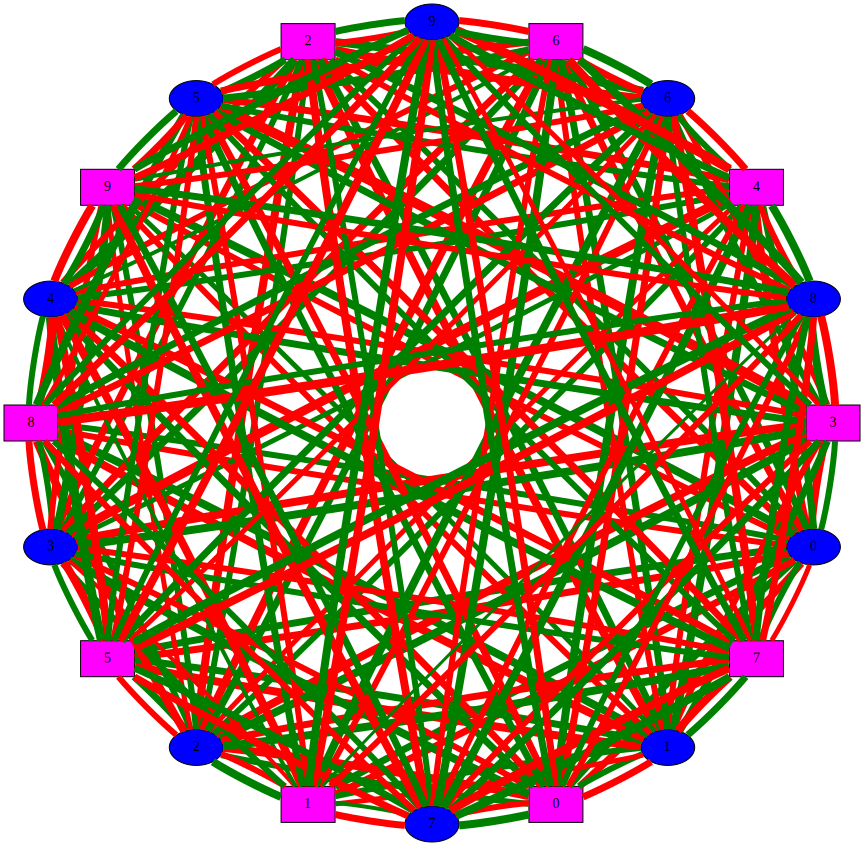

In [40]:
model.plot_graph(0, 8000)

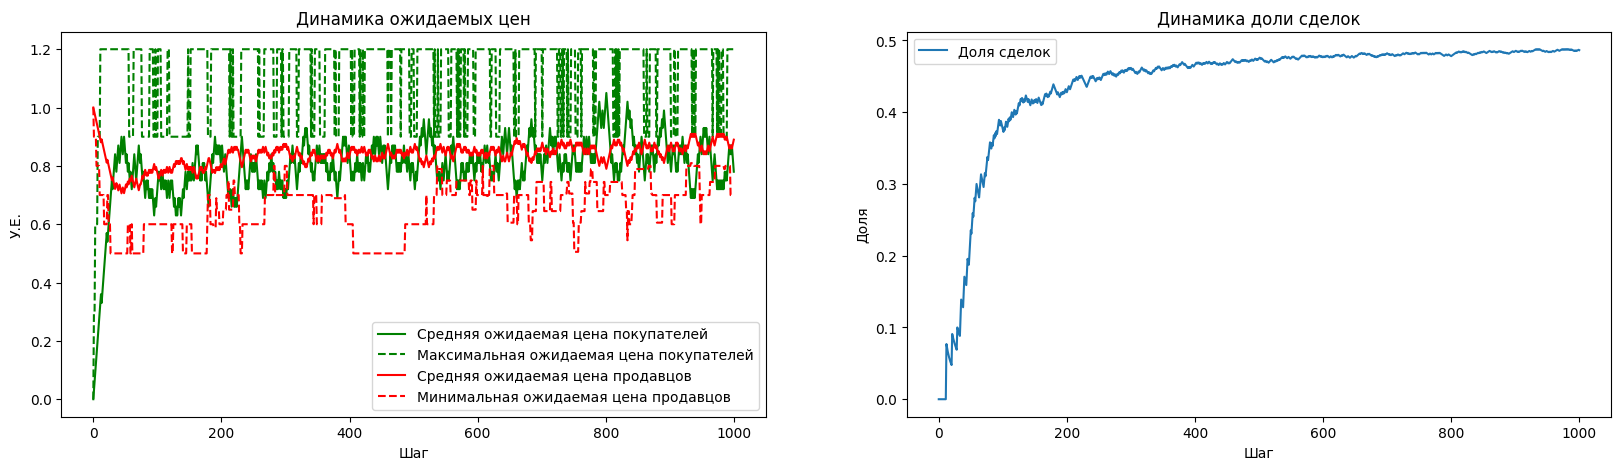

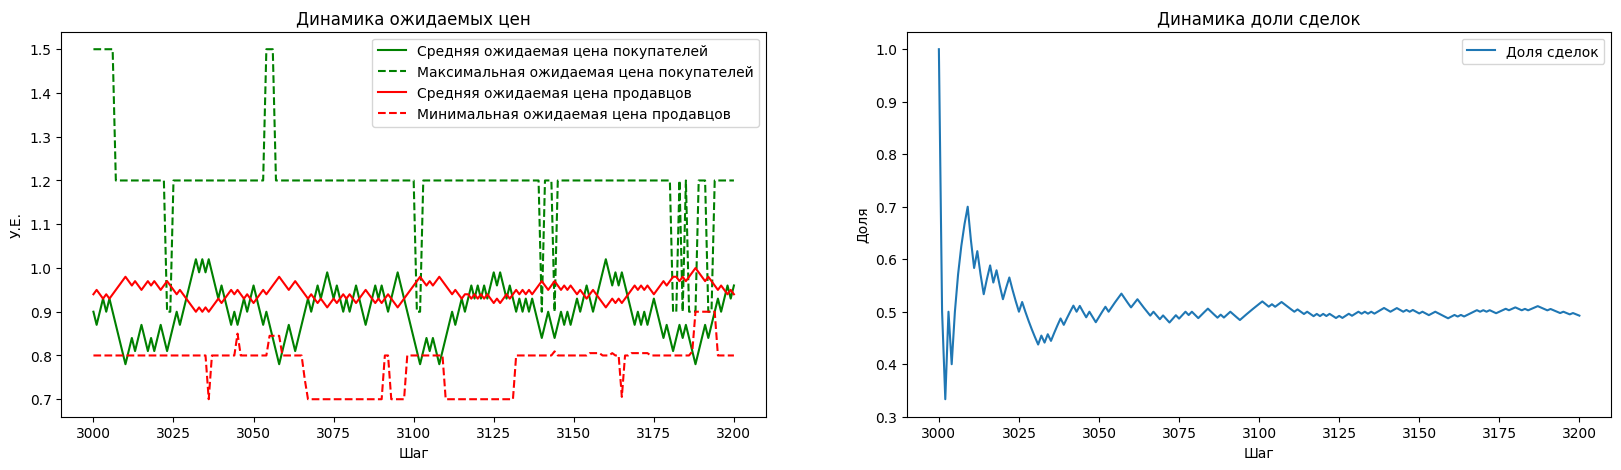

<Figure size 2000x500 with 0 Axes>

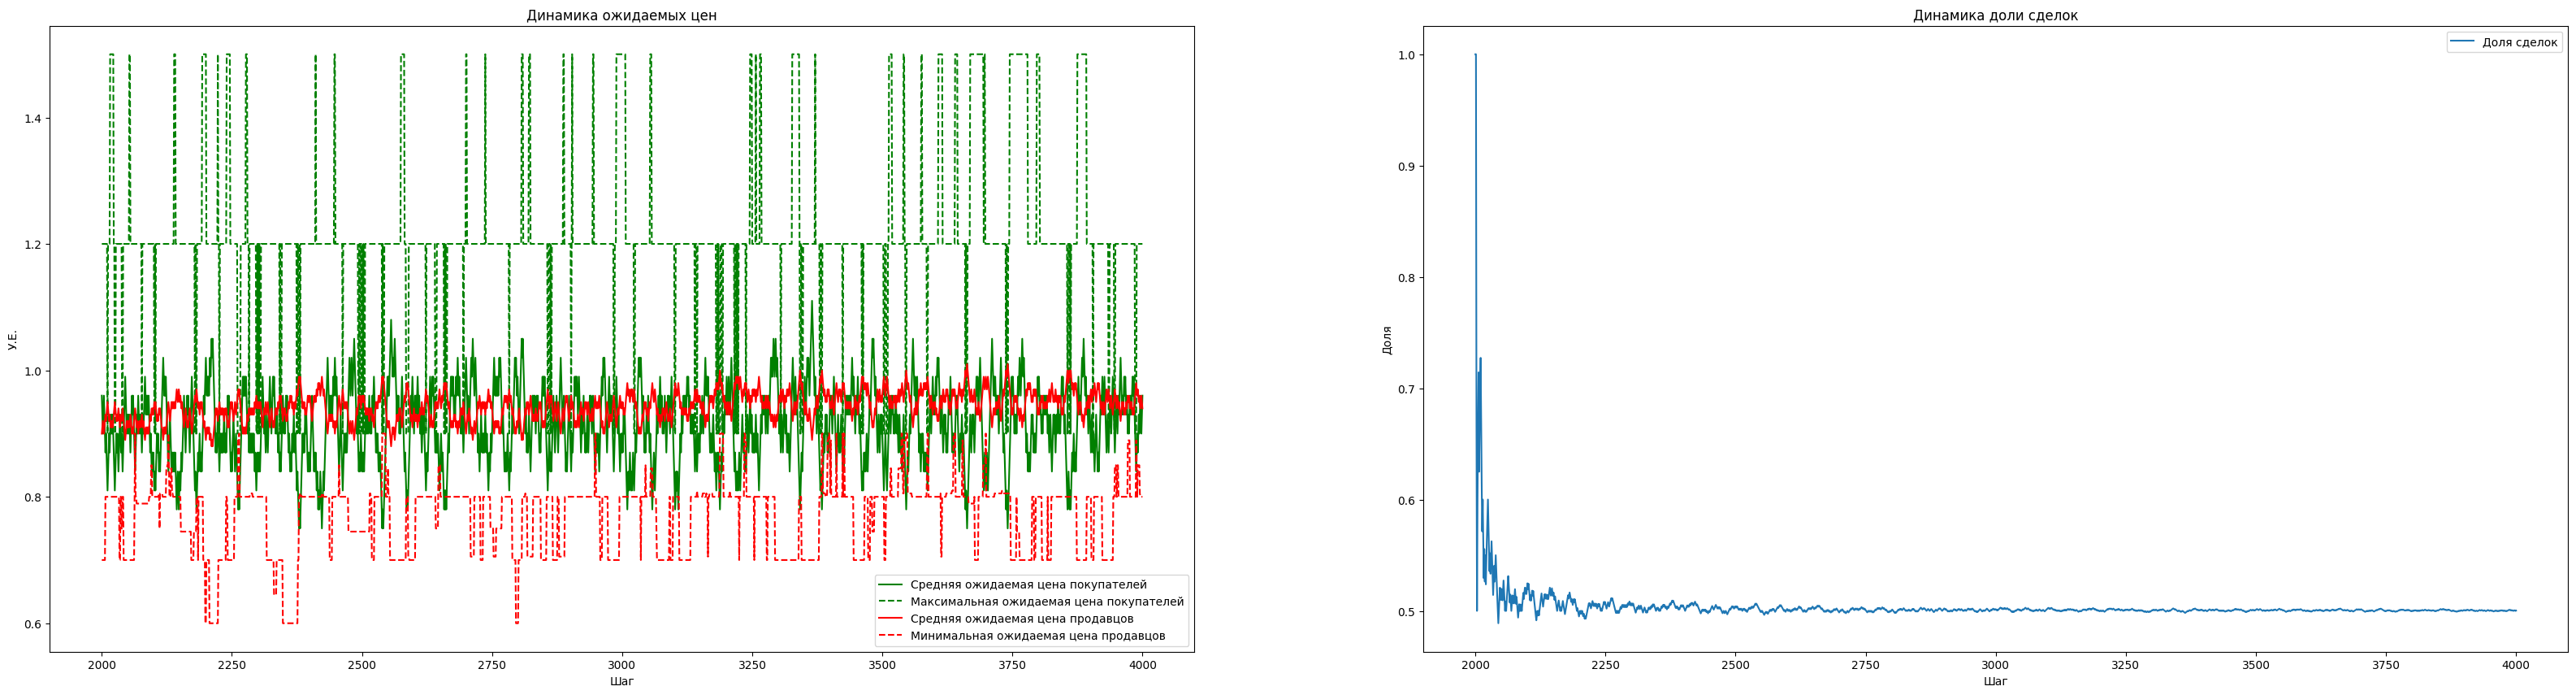

In [41]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(3000, 3200)
model.plot_dynamics(2000, 4000)

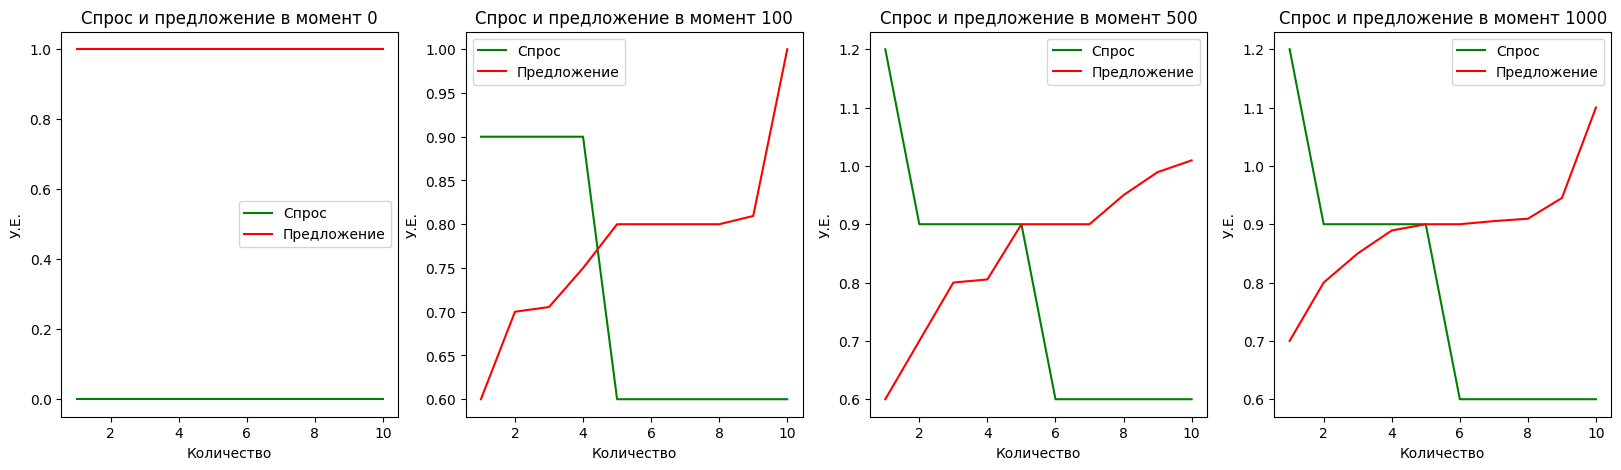

In [16]:
model.plot_supply_and_demand([0, 100, 500, 1000])

Мы добавили в модель дневные показатели в нашем случае каждый покупатель покупает не больше определенного количества товара в день, если он превысил свою норму, то контактов его и продавца больше не состоится, кроме того я поставил проверку, на то, что день ещё не закончился, а у покупателей превышено количество купленного товара, для относительно больших отношений max_connections и consumer_cnt_per_day(это максимальное количество купленного товара для покупателя), таких, что max_connections порядка 2**consumer_cnt_per_day*num_of_consumers (2 появляется потому, что успешных сделок у нас примерно 1/2), иначе ограничение на количество покупок в день работать не будет. Когда max_connections большое относительно уже сказанное величины, то получается, что каждый день каждый покупатель совершает одинаковое количество сделок, следовательно диаграмма связей становится симметричной. Из-за этого если сравнивать одинаковые участки графика доли сделок для 1 модели и для 3 модели, то колебания на 2 графике меньше, так происходит из-за того, что теперь ожидаемая цена одного покупателя более сопоставима с общей ожидаемой ценой всех покупателей, не случается такого, что одному агенту несколько раз везет в сделках и после этого, он понижает цену других продавцов, по той же причине сглаживаются колебания на графике ожидаемой цены покупателя, однако это не полностью их убирает, так как эти колебания в целом зависят от дельты. Кроме этого сшлаживаются и колебания на графике ожидаемой цены продавца(опять таки потому, что уменьшаются колебания доли сделок вокруг значения 0,5)




## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

"Оптовик". На рынке есть один большой игрок, совершенные с ним сделки покупателей не влияют на его ожидаемую цену, а вот на ожидаемую цену покупателя влияют. Причем каждый такт оптовик устанавливает цену равную минимальной среди всех продавцов. Чтобы сильно не ломать модель будем считать, что у оптовика можно купить товар всего 1 раз в один такт(это может быть тот же такт, что и прежде, а может и нет).

In [42]:
def mean(lst):
    return sum(lst)/len(lst)


class Model_4:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, period_1, period_2): 
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            period_1 -- такт, в который меняется цена оптовика
            period_2 -- такт, в который происходит покупка у оптовика
            cnt - количество контактов продавцов и покупателей

        '''
        self.consumer_min = consumer_min
        self.consumer_max = consumer_max
        self.seller_min = seller_min
        self.seller_max = seller_max
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.period_1 = period_1
        self.period_2 = period_2
        self.cnt = 0

        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Мы сделаем одного оптовика, так как их количество в целом не влияет на модель
        
        min_price = min([seller.expect_price for seller in self.sellers])
        self.big_seller = Big_Seller(min_price)

        self.consumers_expect_price = []

        self.sellers_expect_price = []


        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:

            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            self.consumers[consumer_id].decrease_expect_price()


            self.sellers[seller_id].increase_expect_price()
            
        else:
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            self.sellers[seller_id].decrease_expect_price()


            self.consumers[consumer_id].increase_expect_price()
        self.cnt += 1

    
    def big_deal(self, consumer_id): #это я так назвал сделку с оптовиком)))
        '''
            Моделирование сделки между покупателем с индексом consumer_id и оптовиком

            consumer_id -- индекс покупателя в массиве self.consumers
            big_seller - оптовик 
        '''
        
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.big_seller.price <= self.consumers[consumer_id].expect_price:
            self.consumers[consumer_id].decrease_expect_price()
            
        else:

            self.consumers[consumer_id].increase_expect_price()
        self.cnt += 1


            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): 
            
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            seller_id = random.randrange(0, self.num_of_sellers)
            if (self.cnt%self.period_2 != self.period_2 - 1):
                self.deal(consumer_id, seller_id)
            else:
                self.big_deal(consumer_id)

            #смена цены каждый такт 
            if (self.cnt%self.period_1 == self.period_1 - 1):
                min_price = min([seller.expect_price for seller in self.sellers])
                self.big_seller.change_price(min_price) 
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        fig = plt.figure(figsize = (20,5))
        if end - start >= 2000:
            fig = plt.figure(figsize = (40,10))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")


        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
          
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        g_deals = {}

        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }
 
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: 
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta

class Big_Seller: #класс оптовика
    def __init__(self, price):
        self.price = price
    def change_price(self, price):
        self.price = price


In [43]:
random.seed(42)
model = Model_4(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.3,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              period_1 = 100, 
              period_2 = 10)
model.run(20000)

100%|██████████| 20001/20001 [00:00<00:00, 75048.64it/s]


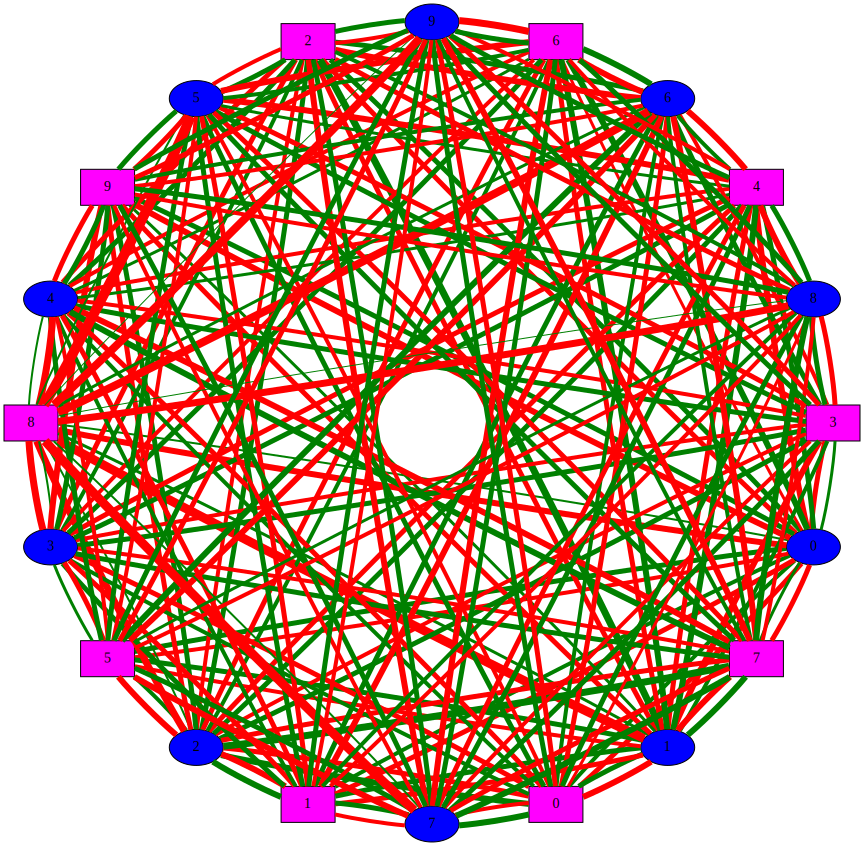

In [44]:
model.plot_graph(0, 8000)

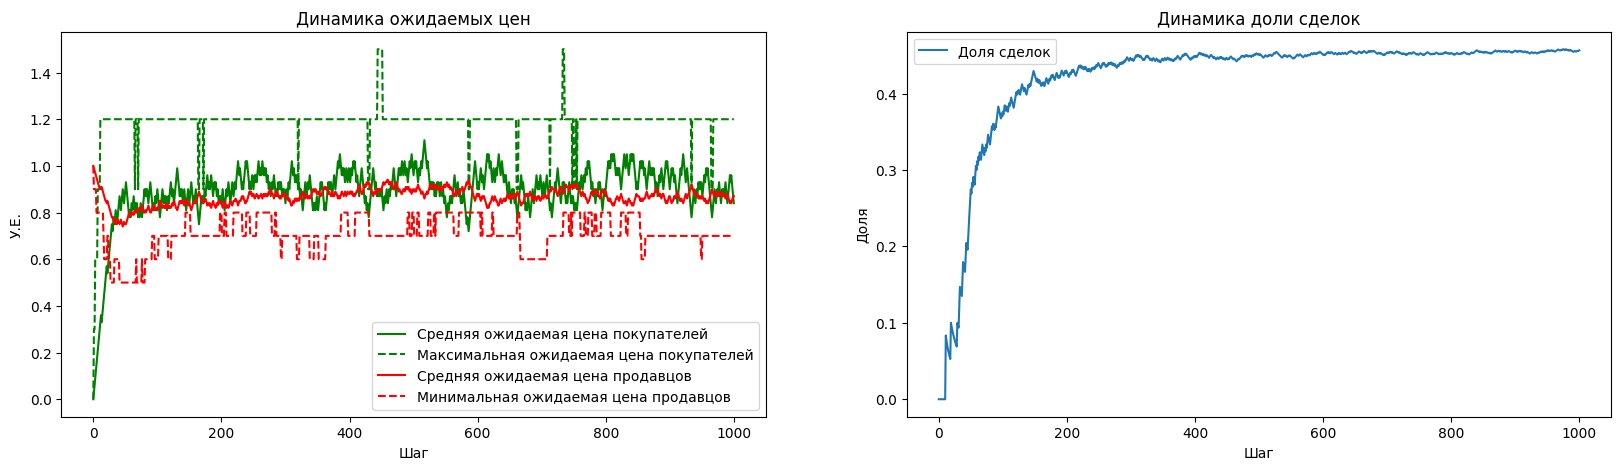

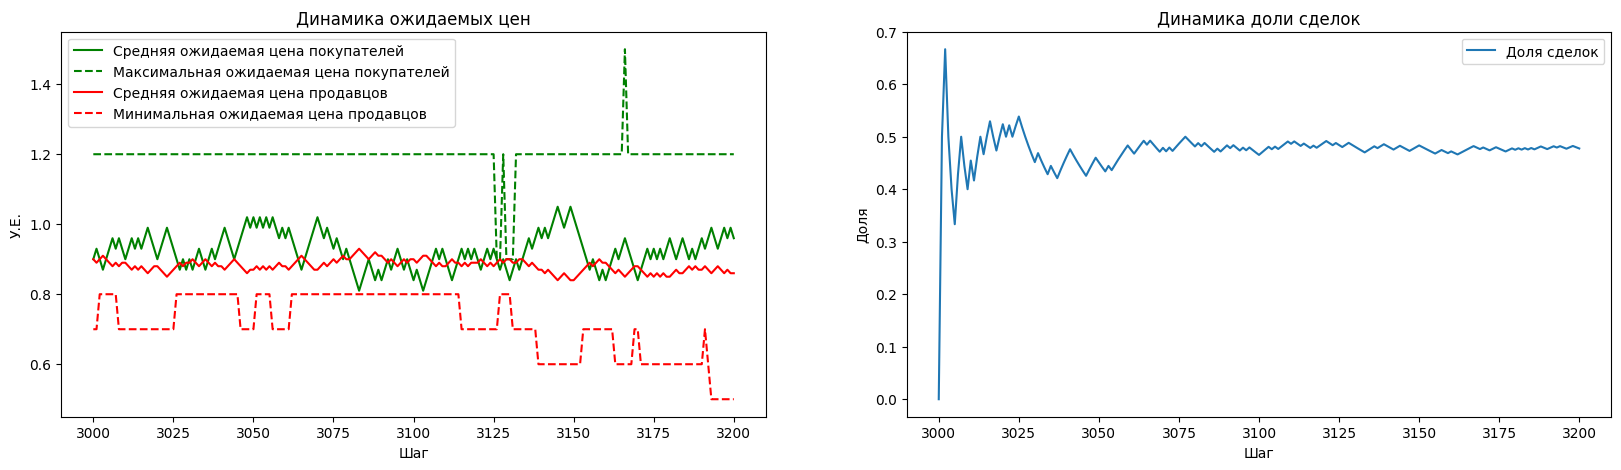

<Figure size 2000x500 with 0 Axes>

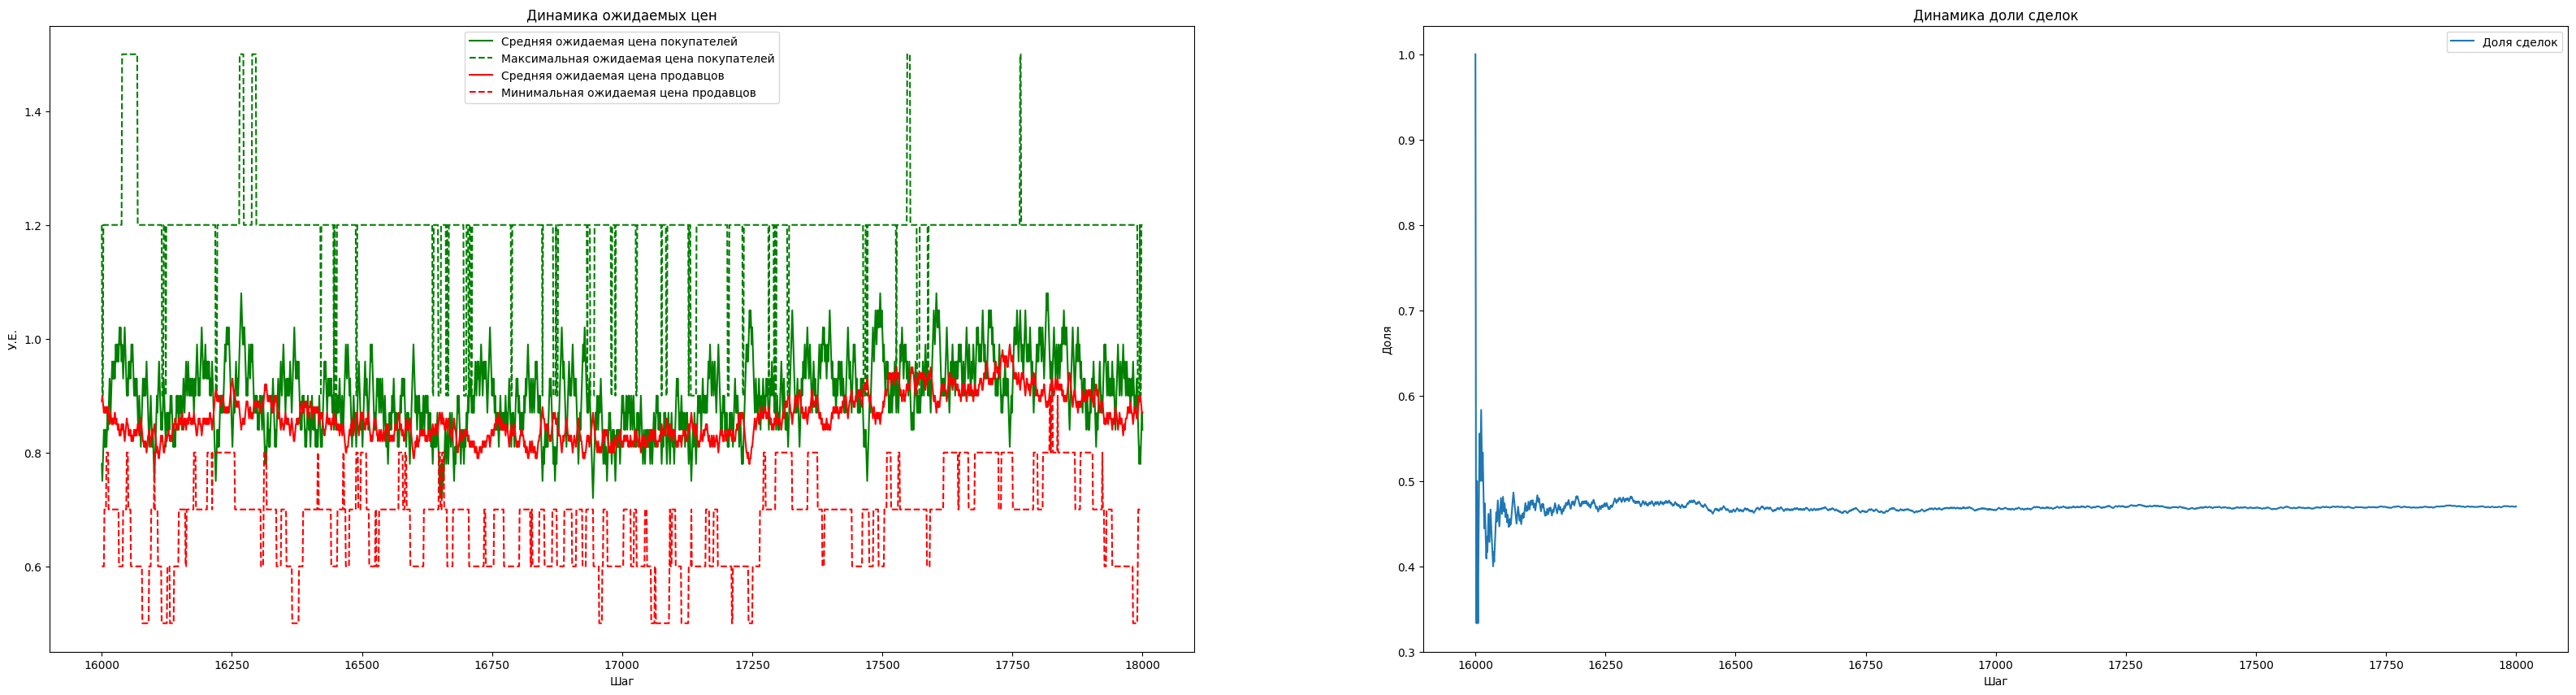

In [46]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(3000, 3200)
model.plot_dynamics(16000, 18000)

По сравнению с первой моделью уменьшилась средняя ожидаемая цена покупателей и продавцов, причем даже для больших значений сделки продавца и оптовика(порядка 100) это изменение все ещё заметно, так происходит потому что оптовик продаетсвои товары по низкой цене и это влияет не только на ожидания покупателей, но и на ожидания продавцов, которые потом совершают сделки с этими покупателями. Так же на графике ожидаемых цен возникают колебания, периоды которых значительно больше, чем периоды, подающиеся в модель, однако можно заметить, что периоды этих колебаний изменяются вместе с period_2, я предполагаю, что эти периодах сначала происходит последовательное уменьшение равновесной цены из-за действий оптовика, потом, т.к. цена не может падать постоянно происходит такое, что продавец с минимальной ценой меняется и минимальная ожидаемая цена увеличивается, после этого даже цена оптовика становится большой для покупателей, и появляется тренд на рост равновесной цены. Кроме того доля сделок вышла на константный уровень ниже 0,5(зависит от такта сделки с оптовиком), потому что сделка с оптовиком не учитывается во всех сделках, но влияет на цену покупателей, поэтому покупатели реже заключают сделки с обычными продавцами. 
